### 표준화 - 표준점수와 편차값

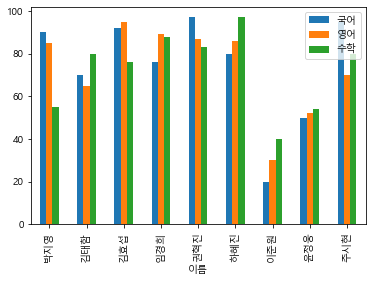

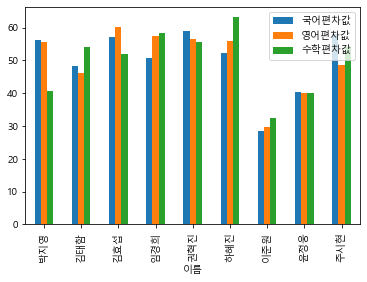

In [49]:
import numpy as np
import pandas as pd

from matplotlib import font_manager, rc
import platform

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

data = pd.read_csv('./data/student.csv', index_col='이름', encoding='cp949')

#1. 인덱스를 기본으로 막대 그래프 그리기
data.plot(kind='bar')

#2. 표준화 작업하기 (각 열의 평균과 표준편차 구하기)
kormean, korstd = data['국어'].mean(), data['국어'].std()
engmean, engstd = data['영어'].mean(), data['영어'].std()
mathmean, mathstd = data['수학'].mean(), data['수학'].std()

#3. 표준점수를 계산한 열 추가해주기
#cf. 0이면 중간. 1.0이면 상하위 15%. 2.0이면 상하위 1.1%
data['국어표준점수'] = (data['국어']-kormean)/korstd
data['영어표준점수'] = (data['영어']-engmean)/engstd
data['수학표준점수'] = (data['수학']-mathmean)/mathstd
data

#4. 편차값 계산 하기 10*표준값 + 50
data['국어편차값'] = (data['국어표준점수']*10+50)
data['영어편차값'] = (data['영어표준점수']*10+50)
data['수학편차값'] = (data['수학표준점수']*10+50)
data

#5. 1번보다 표준화시킨 4번 점수로 그래프를 다시 그리는게 과목별, 과목간 비교가 쉬울것
data[['국어편차값','영어편차값','수학편차값']].plot(kind='bar')

### 정규화 

In [26]:
#1. 최대값으로 나누어서 값을 저장 - 정규화
#정규화 방법 1 : 자기값을 해당 컬럼의 최대값으로 나누기
#정규화 방법 2 : 자기 값 - 최소값 / (최대값 - 최소값)

data['국어정규화1'] = data['국어']/data['국어'].max()
data['국어정규화2'] = (data['국어']-data['국어'].min())/(data['국어'].max()-data['국어'].min())

,국어,영어,수학,국어표준점수,영어표준점수,수학표준점수,국어편차값,영어편차값,수학편차값,국어정규화1,국어정규화2
이름,,,,,,,,,,,
박지영,90,85,55,0.616320,0.554321,-0.941716,56.163201,55.543208,40.582843,0.927835,0.909091
김태함,70,65,80,-0.176091,-0.386979,0.399335,48.239085,46.130213,53.993351,0.721649,0.649351
김효섭,92,95,76,0.695561,1.024971,0.184767,56.955613,60.249706,51.847670,0.948454,0.935065
임경희,76,89,88,0.061632,0.742581,0.828471,50.616320,57.425807,58.284714,0.783505,0.727273
권혁진,97,87,83,0.893664,0.648451,0.560261,58.936642,56.484508,55.602612,1.000000,1.000000
하혜진,80,86,97,0.220114,0.601386,1.311250,52.201143,56.013858,63.112497,0.824742,0.779221
이준원,20,30,40,-2.157120,-2.034253,-1.746346,28.428796,29.657471,32.536538,0.206186,0.000000
윤정웅,50,52,54,-0.968503,-0.998823,-0.995358,40.314970,40.011766,40.046423,0.515464,0.389610
주시현,95,70,80,0.814423,-0.151654,0.399335,58.144230,48.483462,53.993351,0.979381,0.974026


### 사이킷런을 이용한 Scailing

In [48]:
from sklearn import preprocessing

#하는 방법은 다 똑같고 메소드 이름만 다르다.
scaler = preprocessing.StandardScaler() # << 이 StandardScaler대신 다른 표준화 방법 이름을 갖다 넣음 된다.

result = scaler.fit_transform(data[['국어']].values)
#왜 대괄호가 두개인가???
# >> 머신러닝의 데이터들은 모두 array를 이용하는데, data['국어']는 1차원 데이터가 된다. 

print(result) #표준화 값을 구한 것
print(np.mean(result)) #0인지 확인
print(np.std(result)) #1인지 확인

[[ 0.6537062 ]
 [-0.1867732 ]
 [ 0.73775414]
 [ 0.06537062]
 [ 0.94787399]
 [ 0.2334665 ]
 [-2.28797169]
 [-1.0272526 ]
 [ 0.86382605]]
1.2335811384723961e-17
1.0


### 거리행렬을 이용한 표준화 - 유클리드, 맨하튼, 최대값

In [56]:
matrix = data[['국어','영어']].values
matrix

from sklearn import preprocessing

# 유클리드 거리로 표준화 하는 객체 생성하기. 맨하튼을 쓸거면 l1. 
norm = preprocessing.Normalizer(norm='l2')
print(norm.transform(matrix))

#맨하튼 거리로 계산
norm = preprocessing.Normalizer(norm='l1')
print(norm.transform(matrix))

#최대값으로 계산
norm = preprocessing.Normalizer(norm='max')
print(norm.transform(matrix))

[[0.72701315 0.68662353]
 [0.73279349 0.6804511 ]
 [0.6956733  0.7183583 ]
 [0.64938292 0.76046158]
 [0.74443789 0.66769172]
 [0.68110394 0.73218674]
 [0.5547002  0.83205029]
 [0.69310872 0.72083306]
 [0.80505584 0.59319904]]
[[0.51428571 0.48571429]
 [0.51851852 0.48148148]
 [0.49197861 0.50802139]
 [0.46060606 0.53939394]
 [0.52717391 0.47282609]
 [0.48192771 0.51807229]
 [0.4        0.6       ]
 [0.49019608 0.50980392]
 [0.57575758 0.42424242]]
[[1.         0.94444444]
 [1.         0.92857143]
 [0.96842105 1.        ]
 [0.85393258 1.        ]
 [1.         0.89690722]
 [0.93023256 1.        ]
 [0.66666667 1.        ]
 [0.96153846 1.        ]
 [1.         0.73684211]]


### 다중공선성 이슈

In [60]:
polynomial = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
result = polynomial.fit_transform(matrix)
result

polynomial = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
result = polynomial.fit_transform(matrix)
result

array([[9.00000e+01, 8.50000e+01, 8.10000e+03, 7.65000e+03, 7.22500e+03,
        7.29000e+05, 6.88500e+05, 6.50250e+05, 6.14125e+05],
       [7.00000e+01, 6.50000e+01, 4.90000e+03, 4.55000e+03, 4.22500e+03,
        3.43000e+05, 3.18500e+05, 2.95750e+05, 2.74625e+05],
       [9.20000e+01, 9.50000e+01, 8.46400e+03, 8.74000e+03, 9.02500e+03,
        7.78688e+05, 8.04080e+05, 8.30300e+05, 8.57375e+05],
       [7.60000e+01, 8.90000e+01, 5.77600e+03, 6.76400e+03, 7.92100e+03,
        4.38976e+05, 5.14064e+05, 6.01996e+05, 7.04969e+05],
       [9.70000e+01, 8.70000e+01, 9.40900e+03, 8.43900e+03, 7.56900e+03,
        9.12673e+05, 8.18583e+05, 7.34193e+05, 6.58503e+05],
       [8.00000e+01, 8.60000e+01, 6.40000e+03, 6.88000e+03, 7.39600e+03,
        5.12000e+05, 5.50400e+05, 5.91680e+05, 6.36056e+05],
       [2.00000e+01, 3.00000e+01, 4.00000e+02, 6.00000e+02, 9.00000e+02,
        8.00000e+03, 1.20000e+04, 1.80000e+04, 2.70000e+04],
       [5.00000e+01, 5.20000e+01, 2.50000e+03, 2.60000e+03, 2.

### 변환

In [74]:
matrix = np.array([[100,200], [300,150]])
print(matrix)

def intconvert(x):
    return x + 100

#matrix 데이터를 정수로 변환하기
transformer = preprocessing.FunctionTransformer(intconvert)
matrix = transformer.transform(matrix)
matrix

[[100 200]
 [300 150]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


array([[200, 300],
       [400, 250]])